In [1]:
from shapely.geometry import Point, LineString, Polygon

# Point

In [2]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

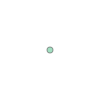

In [3]:
point1

In [4]:
print(point2)
print(point3D)

POINT (7.2 -25.1)
POINT Z (9.26 -2.456 0.57)


In [5]:
type(point3)

shapely.geometry.point.Point

In [6]:
point1.geom_type

'Point'

In [7]:
point_coords = point1.coords
print(point_coords)
print(type(point_coords))

<class 'shapely.coords.CoordinateSequence'>


In [10]:
xy = point_coords.xy
x, y = point1.x, point1.y

In [11]:
print(f'xy: {xy}')
print(f'x: {x}')
print(f'y: {y}')

xy: (array('d', [2.2]), array('d', [4.2]))
x: 2.2
y: 4.2


In [12]:
point_dist = point1.distance(point2)
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


# LineString

In [13]:
line1 = LineString([point1, point2, point3])
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

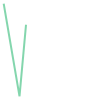

In [14]:
line1

In [15]:
print(line1)
print(line2)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [16]:
print(f'Object data type: {line1}')
print(f'Geometry type as text: {line1.geom_type}')

Object data type: LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
Geometry type as text: LineString


In [18]:
lxy = line1.xy
print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [19]:
l_length = line1.length
l_centroid = line1.centroid

In [21]:
print('Length of our line: {0:.2f}'.format(l_length))
print(f'Centroid of our line: {l_centroid}')
print(f'Type of the centroid: {type(l_centroid)}')

Length of our line: 52.46
Centroid of our line: POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


# Polygon

In [26]:
poly1 = Polygon([point1, point2, point3])
poly2 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

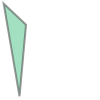

In [27]:
poly1

In [28]:
print(poly1)
print(poly2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [30]:
print(f'Object data type: {type(poly1)}')
print(f'Geometry type as text: {poly1.geom_type}')

Object data type: <class 'shapely.geometry.polygon.Polygon'>
Geometry type as text: Polygon


In [32]:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric coo

In [33]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [34]:
world = Polygon(shell=world_exterior)
world_with_hole = Polygon(shell=world_exterior, holes=hole)

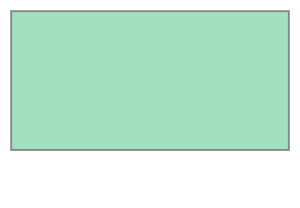

In [35]:
world

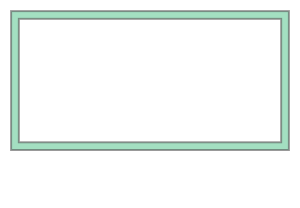

In [36]:
world_with_hole

In [38]:
print('world:', world)
print('world_has_a_hole:', world_with_hole)
print('type:', type(world_with_hole))

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>


In [39]:
world_centroid = world.centroid
world_area = world.area
world_bbox = world.bounds
world_ext = world.exterior
world_ext_length = world_ext.length

In [40]:
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


In [45]:
world.exterior.xy

(array('d', [-180.0, -180.0, 180.0, 180.0, -180.0]),
 array('d', [90.0, -90.0, -90.0, 90.0, 90.0]))

# Geometry Collections

In [46]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [47]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


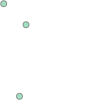

In [48]:
multi_point

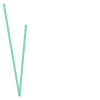

In [49]:
multi_line

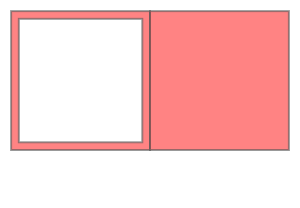

In [50]:
multi_poly

In [51]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))


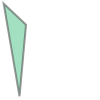

In [53]:
print("Convex hull of the points: ", convex)
convex

In [54]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

# Print output:
print("Number of lines in MultiLineString:", lines_count)

Number of lines in MultiLineString: 2


In [57]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)

Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0


In [59]:
# We can also check if we have a “valid” MultiPolygon. 
# MultiPolygon is thought as valid if the individual polygons does not intersect with each other.
# Here, because the polygons have a common 0-meridian, we should NOT have a valid polygon
valid = multi_poly.is_valid
print("Is polygon valid?: ", valid)

Is polygon valid?:  False


### 